In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


c:\Users\casov\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
print(train.shape)
print(train.info())

(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


c:\Users\casov\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


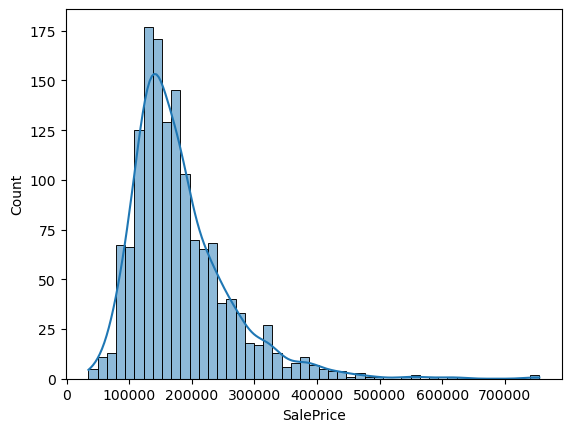

In [6]:
sns.histplot(train["SalePrice"],kde = True)
plt.show()

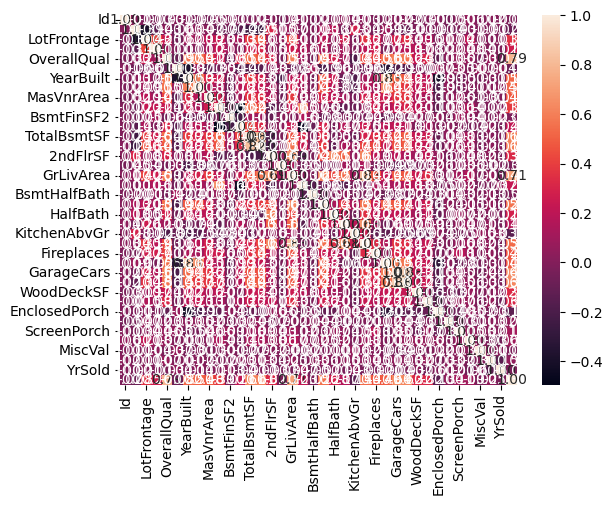

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        3
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64


In [7]:
numeric_features = train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = train.select_dtypes(include=['object']).columns

corr_matrix = train[numeric_features].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.show()

print(train[categorical_features].nunique())

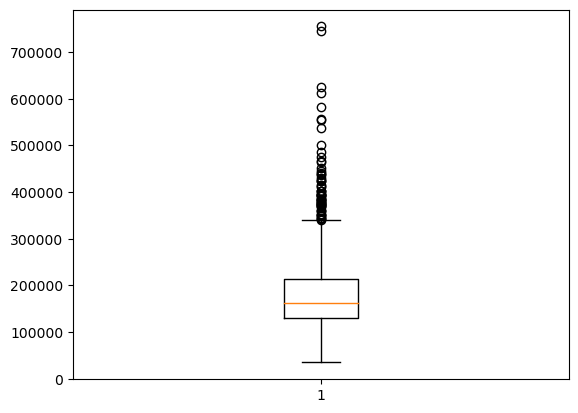

In [8]:
plt.boxplot(train["SalePrice"])
plt.show()

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


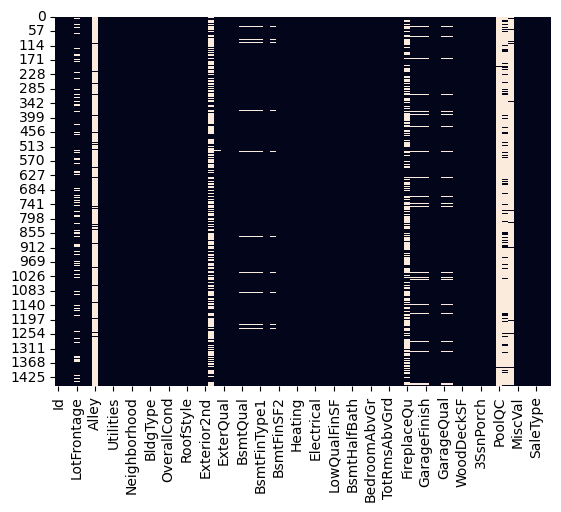

In [9]:
missing_data = train.isnull().sum().sort_values(ascending=False)
print(missing_data[missing_data > 0])

sns.heatmap(train.isnull(), cbar=False)
plt.show()

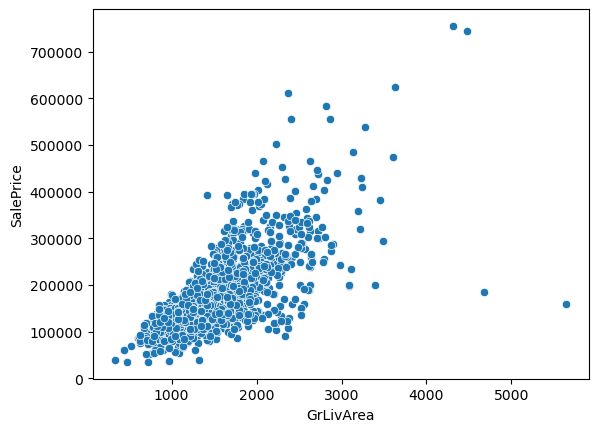

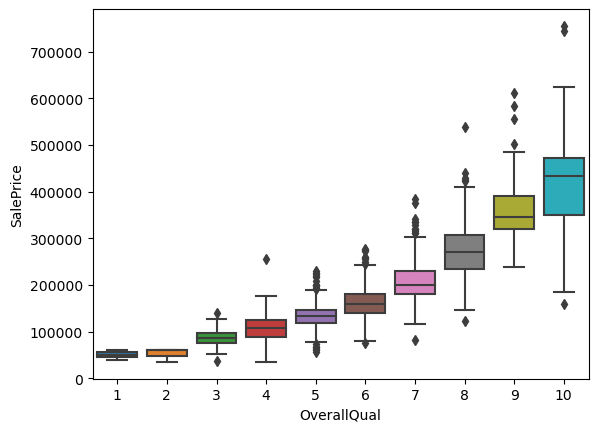

In [10]:
sns.scatterplot(x=train['GrLivArea'], y=train['SalePrice'])
plt.show()

sns.boxplot(x=train['OverallQual'], y=train['SalePrice'])
plt.show()

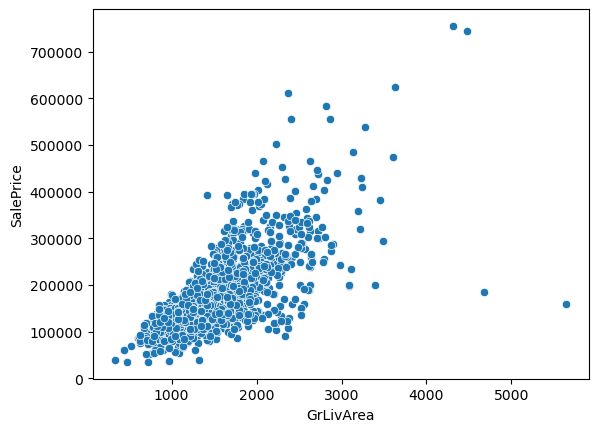

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
11      12          60       RL         85.0    11924   Pave   NaN      IR1   
53      54          20       RL         68.0    50271   Pave   NaN      IR1   
58      59          60       RL         66.0    13682   Pave   NaN      IR2   
112    113          60       RL         77.0     9965   Pave   NaN      Reg   
151    152          20       RL        107.0    13891   Pave   NaN      Reg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1268  1269          50       RL          NaN    14100   Pave   NaN      IR1   
1353  1354          50       RL         56.0    14720   Pave   NaN      IR1   
1373  1374          20       RL          NaN    11400   Pave   NaN      Reg   
1388  1389          20       RL         42.0    14892   Pave   NaN      IR1   
1437  1438          20       RL         96.0    12444   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC Fen

In [11]:
sns.scatterplot(x=train['GrLivArea'], y=train['SalePrice'])
plt.show()

# Определим выбросы через IQR
Q1 = train['SalePrice'].quantile(0.25)
Q3 = train['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
outliers = train[(train['SalePrice'] < (Q1 - 1.5 * IQR)) | (train['SalePrice'] > (Q3 + 1.5 * IQR))]
print(outliers)

In [12]:
target_corr = corr_matrix["SalePrice"].sort_values(ascending=False)
selected_features = target_corr[target_corr>0.5].index

In [13]:
selected_features

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')

In [108]:

model = RandomForestRegressor()
model.fit(train[selected_features].drop('SalePrice', axis=1), train['SalePrice'])

feature_importances = pd.Series(model.feature_importances_, index=selected_features.drop('SalePrice')).sort_values(ascending=False)
print(feature_importances)

OverallQual     0.598166
GrLivArea       0.149075
TotalBsmtSF     0.066619
1stFlrSF        0.042896
GarageArea      0.034281
YearBuilt       0.029300
YearRemodAdd    0.027276
GarageCars      0.025603
TotRmsAbvGrd    0.015364
FullBath        0.011419
dtype: float64


In [15]:
train_encoded = pd.get_dummies(train, drop_first=True)
train_encoded

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,False,True,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,False,True,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,False,True,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,False,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,False,False,False,False,True,False,False,False,True,False
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,False,False,False,False,True,False,False,False,True,False
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,False,False,False,False,True,False,False,False,True,False
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,False,False,False,False,True,False,False,False,True,False


In [111]:
# Используем One-Hot Encoding для всех категориальных признаков
train_encoded = pd.get_dummies(train, drop_first=True)

# Обучение модели
model = RandomForestRegressor()

model.fit(train_encoded.drop('SalePrice', axis=1), train_encoded['SalePrice'])

# Извлечение значимости признаков
# Используем правильный индекс — train_encoded.drop('SalePrice', axis=1).columns
feature_importances = pd.Series(model.feature_importances_, index=train_encoded.drop('SalePrice', axis=1).columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Выводим значимость признаков
# feature_importances.head(13)
feature_importances

ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [110]:
feature_importances.head(15)

OverallQual     0.598166
GrLivArea       0.149075
TotalBsmtSF     0.066619
1stFlrSF        0.042896
GarageArea      0.034281
YearBuilt       0.029300
YearRemodAdd    0.027276
GarageCars      0.025603
TotRmsAbvGrd    0.015364
FullBath        0.011419
dtype: float64

In [103]:
feature = feature_importances[:245].index
X = train_encoded[feature]
y = train_encoded["SalePrice"]

In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

model = XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [105]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
# test_encoded = pd.get_dummies(test,drop_first=True)
# X_test = test_encoded[feature]
y_pred = model.predict(X_test)
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')

MSE: 779032885.9832195
MAE: 17295.007170376713
R^2: 0.8984354947963931


In [106]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,X,y, cv=5,scoring='neg_mean_absolute_error')
print(-scores.sum())
print(-scores)

90342.90893889125
[18962.94365368 18688.69575396 18021.16655073 15955.98667594
 18714.11630458]


In [ ]:
array([19250.12771565, 21093.95085081, 20137.51573202, 17020.52865475,
       18791.63872539])


50 feature: 87530.13682577056
[17814.03456764 18852.0883856  17368.27001284 15943.04430651
 17552.69955319]



In [ ]:
# from sklearn.model_selection import GridSearchCV
# from xgboost import XGBRegressor

# param_grid = {
#     'n_estimators': [100, 200],
#     'learning_rate': [0.01, 0.1],
#     'max_depth': [3, 6, 10],
#     'min_child_weight': [1, 5],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0],
#     'gamma': [0, 0.1]
# # }

# model = XGBRegressor(random_state=42)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
# grid_search.fit(X_train, y_train)

# print(f'Best parameters: {grid_search.best_params_}')
# print(f'Best score: {-grid_search.best_score_}')

Best parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1.0}
Best score: 19543.041496824102


In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')

MSE: 753971533.0408248
MAE: 18756.075623394692
R^2: 0.9017028073285396


In [ ]:
test_encoded = pd.get_dummies(test,drop_first=True)
X_test = test_encoded[feature]
y_pred2 = best_model.predict(X_test)
y_pred2

array([123505.9  , 148504.16 , 164584.73 , ..., 148177.47 , 116872.414,
       222409.97 ], dtype=float32)

In [ ]:
y_pred2.shape

(1459,)

In [ ]:
test_ids = pd.read_csv("test.csv")['Id']


pred = pd.DataFrame({
    "Id" : test_ids,
    "SalePrice" : y_pred2
})
pred.to_csv('result.csv', index=False)